# Battle of Neighbourhoods - final

#### 1 Introduction/Business Problem

    1.a Discussion of the business problem and the audience who would be interested in this project.

#### 2 Data Section

    2.a What data is used?
    2.b Importing Libraries
    2.c Credentials and Core location
    2.d Search for hotel & restaurant within 1 KM
    2.e Location of Hotels

#### 3 Methodology Section

    3.a Removing Outlier
    3.b How Far are hotels from the core location
    3.c Explore for other venues around sharm el sheikh
    3.d Extract Venues using Search Queries
    3.e Location of all venues
    3.f How far are venues from the core location?
    3.g Venue Categories
    3.h Rating of all Venues
    3.i Extracting Rated Venues
    3.j Final list of Venues
    3.k Clustering based on venues
    3.l Center of all clusters & Midpoint of all venues

#### 4 Results Section

    4.a My hotel location
    4.b Top Rated Venues
    4.c Spot my hotel against others
    4.d Few more Stats

#### 5 Discussion Section

#### 6 Conclusion Section

## 1. Introduction/Business Problem

#### Discussion of the business problem and the audience who would be interested in this project.

##### Something about the tourist place - sharm el sheikh,Egypt

    it is an Egyptian city on the southern tip of the Sinai Peninsula, in South Sinai Governorate, on the coastal strip along the Red Sea. Its population is approximately 73,000 as of 2015. Sharm El Sheikh is the administrative hub of Egypt's South Sinai Governorate, which includes the smaller coastal towns of Dahab and Nuweiba as well as the mountainous interior, St. Catherine and Mount Sinai. The city and holiday resort is a significant centre for tourism in Egypt, while also attracting many international conferences and diplomatic meetings.

#### Opening of Hotel/Restaurant Shop

    Coming down to business problem,I would like to open a hotel/restaurant near beach side.As it is a famous tourist spot,there is already lots of attention towards it.I know there will be many competitors in terms of hotel and restauramt.But keeping them in mind,i need to locate my hotel in place where more people are attracted and comfortable for a stay and a good meal.I want to bring foreign and local peoples attention towards my new hotel.I would like to flavour my retaurant recipe with Italian,American,typical Egyptian foods to grab their taste.

    The challenge is to find a suitable location for opening a new hotel / restaurant attracted to all local and foreign people in the centre of all famous venues.

#### Expected / Interested Audience

Well, almost every business man who wnats to open a hotel in sharm el sheikh and needs a good place srounded by lots of nice place that local people and tourists are interseted in it like parks, cafes, dive shops and etc.

## 2.Data section

#### 2.a What data is used?

    We will be completely working on Foursquare data to explore and try to locate our new hotel where more venues like church, beach, museums, memorials that are present nearby.
#### How will we be solving using this data?

    We will look for midpoint area of venues to locate our new hotel.Before that our major focus will be on all venues present in and around the core place of sharm el sheikh.

    Just a heads up on how many hotels are distributed now around sharm el sheikh.We will perform some EDA on hotels & restaurants present in the tourist spot.On furthur notebook we will use Foursquare data to determine other venues as well.

#### 2.b Importing Libraries

In [1]:
!conda install -c conda-forge geopy --yes
!conda install -c conda-forge folium=0.5.0 --yes
!pip install beautifulsoup4
# Import libraries
import numpy as np # data in a vectorized manner manipulation
import pandas as pd # data analsysis
import requests # HTTP library
from bs4 import BeautifulSoup # scraping library

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
import json # JSON files manipulation

from sklearn.cluster import KMeans # clustering algorithm

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt


from geopy.geocoders import Nominatim

import folium # map rendering library

print("*********   done!     ***********")

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.2
  latest version: 4.8.3

Please update conda by running

    $ conda update -n base conda



# All requested packages already installed.

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.2
  latest version: 4.8.3

Please update conda by running

    $ conda update -n base conda



# All requested packages already installed.

*********   done!     ***********


#### 2.c Credentials and Core location

In [2]:

CLIENT_ID = '23C50AA4MZYMOXVM5Q4ZMZNFI1MFXQHRRD0NLJAJU1MZU1YE' # your Foursquare ID
CLIENT_SECRET = 'FBR5LKO0XY34LSXEI4QMX5ZVHCUCFYHDEXIUP1ZJWO12PPZS' # your Foursquare Secret
VERSION = '20191028'
LIMIT = 150

address = "sharm el sheikh, south sinai"

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude =location.latitude   #8.079252 # location.latitude 
longitude =location.longitude #77.5499338 # location.longitude # 

sharm='sharm el sheikh location : {},{}'.format(latitude,longitude)
print(sharm)

sharm el sheikh location : 27.8669082,34.3014551


#### 2.d Search for hotel & restaurant within 1 KM

In [3]:
#Quering for hotel & restaurant

search_query = 'hotel'
search_query_res = 'restaurant'

radius = 1000
url_hotel = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID,
                                                                                                                                         CLIENT_SECRET,
                                                                                                                                         latitude,
                                                                                                                                         longitude,
                                                                                                                                         VERSION,
                                                                                                                                         search_query,
                                                                                                                                         radius,
                                                                                                                                         LIMIT)
url_restaurant = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID,
                                                                                                                                              CLIENT_SECRET,
                                                                                                                                              latitude,
                                                                                                                                              longitude,
                                                                                                                                              VERSION,
                                                                                                                                              search_query_res,
                                                                                                                                              radius,
                                                                                                                                              LIMIT)
#url

##### Send the GET Request of hotel & restaurants and examine the results

In [4]:
results_hotel = requests.get(url_hotel).json()
results_restaurant = requests.get(url_restaurant).json()
#results_hotel

##### Get relevant part of JSON and transform it into a pandas dataframe

In [5]:
# assign relevant part of JSON to venues
venues_hotel = results_hotel['response']['venues']
venues_restaurant = results_restaurant['response']['venues']

# tranform venues into a dataframe and merging both data
dataframe_hotel = json_normalize(venues_hotel)
dataframe_restaurant = json_normalize(venues_restaurant)

dataframe = pd.concat([dataframe_hotel,dataframe_restaurant])

print("There are {} restaurants and hotels at sharm el sheikh".format(dataframe.shape[0]))

There are 41 restaurants and hotels at sharm el sheikh


##### Define information of interest and filter dataframe

In [6]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

    
# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

  
# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

#dataframe_filtered
hotels_df=dataframe_filtered[['name','categories','distance','lat','lng','id']]
hotels_df

,name,categories,distance,lat,lng,id
0,Aida Hotel,Resort,232,27.865193,34.302795,4f7df6cae4b02c4144246ec1
1,Bar Club House at Beach Albatros Hotel,Beach Bar,914,27.858958,34.299093,52eeca4b11d2b781e6bcf21c
2,Reception at Beach Albatros Hotel,Travel Lounge,839,27.859548,34.299601,52eb96a7498ead9f84d77ec8
3,IL Mercato Hotel & Spa,Resort,704,27.863615,34.307564,4ee4dbf661aff5a34229d426
4,Renissance Hotel Spa,Spa,232,27.866892,34.303822,4ffc674ce4b07354de04550e
5,Pool at Aida Hotel,Pool,230,27.864835,34.301360,520d42d811d2869e9eec26fb
6,Sunset Hotel,Resort,367,27.868935,34.304397,501cf25ee4b0d7d7019198ca
7,Tropicana Tivoli Hotel Sharm el-Sheikh,Hotel,477,27.870076,34.304724,4bc87ddadc55eee13e7fe8ac
8,"rejency hotel,sharm alsheikh",Assisted Living,598,27.862221,34.304428,55d060de498efe2636ece494
9,Sunrise Hotel,Hotel,631,27.870116,34.306751,4efb4a268b81ef98d41a9598


#### 2.e Location of Hotels

In [7]:
hotels_map = folium.Map(location=[latitude, longitude], zoom_start=16) # generate map centred around the Kanyakumari

# add a red circle marker to represent the core location of kanyakumari
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='sharm el sheikh',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(hotels_map)

# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(hotels_df.lat, hotels_df.lng, hotels_df.name):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(hotels_map)

# display map
hotels_map

## 3.Methodology section

    In this sections we will perform some data analysis and EDA to find insight from data.We will try to understand the current stats of all given data.Probably,clustering or centroid of all venues will help us to locate new hotel.

#### 3.a Removing Outlier

    from the map we didn't notice any outlier so we will remove nothing

#### 3.b How Far are hotels from the core location

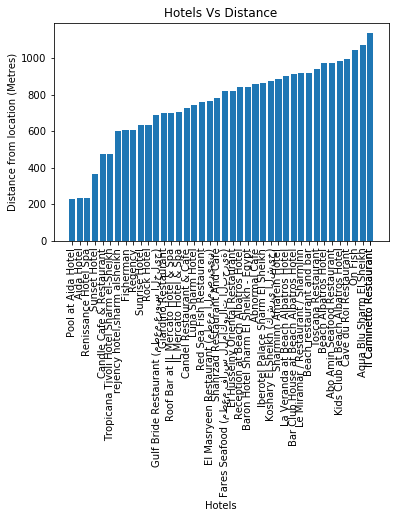

Average distance between hotels and core location is 764 metres


In [8]:
distance_hotel_df=dataframe_filtered[['name','categories','distance','lat','lng']].sort_values('distance')

def plot_bar_x():
    # this is for plotting purpose
    index = np.arange(len(distance_hotel_df.name))
    plt.bar(distance_hotel_df.name, distance_hotel_df.distance)
    plt.xlabel('Hotels')
    plt.ylabel('Distance from location (Metres)')
    plt.xticks(distance_hotel_df.name,rotation=90)
    plt.title('Hotels Vs Distance')
    plt.show()
plot_bar_x()

print("Average distance between hotels and core location is {} metres".format(int(sum(hotels_df['distance'])/hotels_df.shape[0])))

##### Few Take Aways

    -Il Caminetto Restaurant is so far from core point
    -Pool at Aida Hotel is super close from the core point
    -764 metres is average distance from all hotels to core location.

#### 3.c Explore for other venues around sharm el sheikh

    A tourist person always wants to visit nearby iconic places.So he wants to reside somewhere nearby to all major venues.We will be exploring more venues around the core location.We will be digging more on main areas or place around 1 km.

In [9]:
radius=1000
url_venues = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID,
                                                                                                                                  CLIENT_SECRET,
                                                                                                                                  latitude,
                                                                                                                                  longitude,
                                                                                                                                  VERSION,
                                                                                                                                  radius,
                                                                                                                                  LIMIT)
#url_venues

In [10]:

import requests

results_venues = requests.get(url_venues).json()
'There are {} venues around sharm el sheikh.'.format(len(results_venues['response']['groups'][0]['items']))

'There are 53 venues around sharm el sheikh.'

##### Get relevant part of JSON and transform it into a pandas dataframe

In [11]:
items_venues = results_venues['response']['groups'][0]['items']
#items_venues[0]

In [12]:
dataframe_venues = json_normalize(items_venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories'] + [col for col in dataframe_venues.columns if col.startswith('venue.location.')] + ['venue.id']
dataframe_filtered_venues = dataframe_venues.loc[:, filtered_columns]

# filter the category for each row
dataframe_filtered_venues['venue.categories'] = dataframe_filtered_venues.apply(get_category_type, axis=1)

# clean columns
dataframe_filtered_venues.columns = [col.split('.')[-1] for col in dataframe_filtered_venues.columns]

dataframe_filtered_venues.name

0                                      مطعم أبوعلي
1                                          Abo Ali
2                          Red Sea Fish Restaurant
3       La Gazelle (مطعم الغزال للمأكولات البحريه)
4      Fares Seafood (مطعم فارس للمأكولات البحرية)
5                  Iberotel Palace Sharm El Sheikh
6                                Fresh Fish Center
7                           IL Mercato Hotel & Spa
8                                      Hadota cafe
9           El Masryeen Restaurant (مطعم المصريين)
10                                    Metro Market
11          Tropicana Tivoli Hotel Sharm el-Sheikh
12                           Mexicana Sharm Resort
13                                             KFC
14                         Brazilian Coffee Stores
15                 Dive Inn Resort Sharm El Sheikh
16                              Coral Hills Resort
17                            Beach Albatros Hotel
18                                      Sinai Star
19                             

#### 3.d Extract Venues using Search Queries

    When I searched in google map,I could see there were some venues missing.Parks and Museums are also more recognized by visitors and local audience.So lets bring their data inside.I am not sure why Foursquare hasnt captured it while trying venue query.

Below is the function to extract many queries at a time by passing them in a single list.

In [13]:
# search query function
search_query_list = ['park','museum'] 
radius =1000
temp_df=[]
search_df=[]

def search_query_fn():   
    #Loop to run through urls and from json to pandas
    for i in range(len(search_query_list)):
        url= 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query_list[i], radius, LIMIT)
        
        results=requests.get(url).json()
        venues = results['response']['venues']
        
        #Normalize from json
        dataframe = json_normalize(venues)
        
        #Removing unwanted column headers
        dataframe.columns = [col.split('.')[-1] for col in dataframe.columns]
        temp_df.append(dataframe)
    
    #Loop to append dataframes to single dataframe
    for j in range(len(search_query_list)):
        data=temp_df[j]
        search_df.append(data)

# Function to run loop over queries
search_query_fn()

search_df = pd.concat(search_df,sort=True)
search_df['categories'] = search_df.apply(get_category_type, axis=1)
search_df = pd.DataFrame(search_df[['name','categories','distance','lat','lng','id']])
search_df

,name,categories,distance,lat,lng,id
0,30 June Park (حديقة ٣٠ يونيو),Park,592,27.863961,34.296447,55621ac7498e5eb4e115f5f0
1,Albatros Aqua Park,Water Park,1182,27.856835,34.305282,4e60d3e7e4cdf1e2be93a02b
2,Beach Park,Park,989,27.862424,34.292774,50ab7132e4b01463138e0bd9


##### We will collate venues provided by foursquare and the ones extracted through hitting search query API

In [14]:
# Data extracted from foursquare venues
four_sq_venue=pd.DataFrame(dataframe_filtered_venues[['name','categories','distance','lat','lng','id']])

# Data extracted from search queries
new_venues=pd.DataFrame(search_df)

# Concatenate both dataframe
df_venue=pd.concat([four_sq_venue, new_venues],sort=True)

##### Now let us remove hotel & restaurants and get final list of venue

In [15]:
to_drop = ['Hotel', 'Restaurant','hotel','Resort','مطعم','cafe','Cafe','KFC',"McDonald's",'Gad','Pizzeria','Pizza','Koshary']
df_venues = df_venue[~df_venue['name'].str.contains('|'.join(to_drop))].reset_index()
print("There are {} venues in sharm el sheikh".format(df_venues.shape[0]))
df_venues[['name','distance','id']]

There are 28 venues in sharm el sheikh


,name,distance,id
0,Abo Ali,475,5535fabb498e27b0a24abed1
1,Iberotel Palace Sharm El Sheikh,865,4bc87dcedc55eee1337fe8ac
2,Fresh Fish Center,671,5b6df1862f97ec002bb1f165
3,Metro Market,213,4de42c8d8877bcb6866e106b
4,Brazilian Coffee Stores,770,4dc6a90d887717c880414a76
5,Sinai Star,730,4f01d8989911b33a12b91493
6,Melodies,628,4e4ab471d22d876aed1d44b4
7,Old Market (السوق القديم),738,4bbcef0f8ec3d13a0a711b28
8,Beach at Iberotel Palace Sharm El Sheikh,948,52723ba311d2d0a7faed65c0
9,Magic Dive Club,237,508ce2b8e4b01ceeb3dfaefa


#### 3.e Location of all venue

In [16]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=16)

# add a red circle marker to represent the sharm el sheikh
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='kanyakumari',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(df_venues.lat, df_venues.lng, df_venues.name):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='black',
        popup=label,
        fill = True,
        fill_color='black',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

All venues seems to be dispersed

We have listed out number of hotels and venues around sharm el sheikh.There are 41 Hotels/Restaurant and 28 Venues.

#### 3.f How far are venues from the core location?

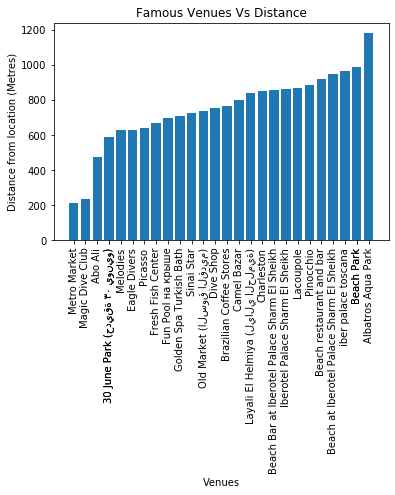

In [17]:
distance_venues_df=df_venues.sort_values('distance')

def plot_bar_venue():
    # this is for plotting purpose
    index = np.arange(len(distance_venues_df.name))
    plt.bar(distance_venues_df.name, distance_venues_df.distance)
    plt.xlabel('Venues')
    plt.ylabel('Distance from location (Metres)')
    plt.xticks(distance_venues_df.name,rotation=90)
    plt.title('Famous Venues Vs Distance')
    plt.show()
plot_bar_venue()

##### Few Take Aways

    -Metro Market and Magic Dive Club are close from our location.
    -Albatros Aqua Park is so far away from our location

#### 3.g Venue Categories

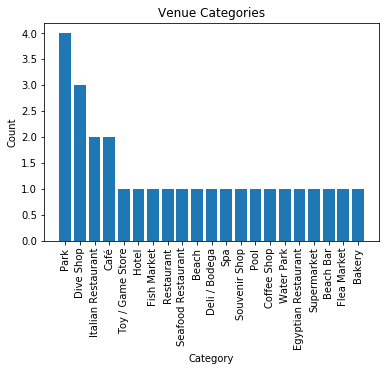

In [18]:
freq_venue=df_venues['categories'].value_counts()
freq_venue=pd.DataFrame(freq_venue).reset_index()
freq_venue.columns=['Category','Count']
freq_venue

def plot_bar_categ():
    # this is for plotting purpose
    index = np.arange(len(freq_venue.Category))
    plt.bar(freq_venue.Category, freq_venue.Count)
    plt.xlabel('Category')
    plt.ylabel('Count')
    plt.xticks(freq_venue.Category,rotation=90)
    plt.title('Venue Categories')
    plt.show()
plot_bar_categ()

Eventhough we didnt have immense data to consider distribution of categories we could see that Park, Dive Shop, Cafe and Italian Restaurant are more common venues.

#### 3.h Rating of all Venues

In [19]:
#Rating of venues
rating_df=[]

for k in range(df_venues.shape[0]):
    venue_id=df_venues.id[k]
    url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
    result = requests.get(url).json()
    #print(result)
    try:
        #print(df_venues.name[k],result['response']['venue']['rating'])
        rating=result['response']['venue']['rating']
        rating_df.append(rating)
        
    except:
        #print(df_venues.name[k],'This venue has not been rated yet.')
        rating='No Rating Yet'
        rating_df.append(rating)
#I put print command in comments so that i don't make the notebook messy

In [20]:
rate_dict = {'Venue': df_venues.name, 'Rating': rating_df,'distance':df_venues.distance}
rate_df=pd.DataFrame(rate_dict)
rate_df

,Venue,Rating,distance
0,Abo Ali,7.5,475
1,Iberotel Palace Sharm El Sheikh,8.1,865
2,Fresh Fish Center,7.4,671
3,Metro Market,6.4,213
4,Brazilian Coffee Stores,6.7,770
5,Sinai Star,6.4,730
6,Melodies,6.2,628
7,Old Market (السوق القديم),6.3,738
8,Beach at Iberotel Palace Sharm El Sheikh,6.3,948
9,Magic Dive Club,No Rating Yet,237


#### 3.i Extracting Rated Venues

In [21]:
#Lets take values of only rated venues
only_rated_tips = rate_df[(rate_df['Rating']!='No Rating Yet')]

only_rated_tips.reset_index(inplace = True,drop = True)
only_rated_tips

,Venue,Rating,distance
0,Abo Ali,7.5,475
1,Iberotel Palace Sharm El Sheikh,8.1,865
2,Fresh Fish Center,7.4,671
3,Metro Market,6.4,213
4,Brazilian Coffee Stores,6.7,770
5,Sinai Star,6.4,730
6,Melodies,6.2,628
7,Old Market (السوق القديم),6.3,738
8,Beach at Iberotel Palace Sharm El Sheikh,6.3,948
9,Golden Spa Turkish Bath,5.9,710


#### 3.J Final list of Venues

In [22]:
rated_list=[]
for i in range(len(only_rated_tips)):
    rated_tip_temp=only_rated_tips['Venue'][i]
    rated_list.append(rated_tip_temp)

#Masking all values present in list
mask = df_venues['name'].isin(rated_list)

final_venues = df_venues[mask]
#final_venues['location']=final_venues['lat'].astype(str).str.cat(final_venues['lng'].astype(str), sep=' - ')
final_venues.reset_index(inplace = True,drop = True) 

final_venues

,index,categories,distance,id,lat,lng,name
0,1,Egyptian Restaurant,475,5535fabb498e27b0a24abed1,27.863824,34.298117,Abo Ali
1,5,Hotel,865,4bc87dcedc55eee1337fe8ac,27.863236,34.293704,Iberotel Palace Sharm El Sheikh
2,6,Fish Market,671,5b6df1862f97ec002bb1f165,27.866195,34.294679,Fresh Fish Center
3,10,Supermarket,213,4de42c8d8877bcb6866e106b,27.866688,34.299305,Metro Market
4,14,Coffee Shop,770,4dc6a90d887717c880414a76,27.867438,34.293648,Brazilian Coffee Stores
5,18,Seafood Restaurant,730,4f01d8989911b33a12b91493,27.865708,34.294159,Sinai Star
6,19,Italian Restaurant,628,4e4ab471d22d876aed1d44b4,27.865374,34.295306,Melodies
7,20,Flea Market,738,4bbcef0f8ec3d13a0a711b28,27.866185,34.293994,Old Market (السوق القديم)
8,23,Beach,948,52723ba311d2d0a7faed65c0,27.862321,34.293338,Beach at Iberotel Palace Sharm El Sheikh
9,28,Spa,710,5141eeb4e4b0af3e52727b40,27.861853,34.305856,Golden Spa Turkish Bath


#### 3.K Clustering based on venues

In [23]:
# one hot encoding
neighbor_onehot = pd.get_dummies(final_venues[['categories']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
neighbor_onehot['name'] = final_venues['name'] 

# move neighborhood column to the first column
fixed_columns = [neighbor_onehot.columns[-1]] + list(neighbor_onehot.columns[:-1])
neighbor_onehot = neighbor_onehot[fixed_columns]

neighbor_onehot.head()

,name,Beach,Café,Coffee Shop,Egyptian Restaurant,Fish Market,Flea Market,Hotel,Italian Restaurant,Seafood Restaurant,Spa,Supermarket
0,Abo Ali,0,0,0,1,0,0,0,0,0,0,0
1,Iberotel Palace Sharm El Sheikh,0,0,0,0,0,0,1,0,0,0,0
2,Fresh Fish Center,0,0,0,0,1,0,0,0,0,0,0
3,Metro Market,0,0,0,0,0,0,0,0,0,0,1
4,Brazilian Coffee Stores,0,0,1,0,0,0,0,0,0,0,0


In [24]:
neighbor_onehot.shape
neighbor_grouped = neighbor_onehot.groupby('name').mean().reset_index()

In [25]:
# Top 10 venues
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['name']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['name'] = neighbor_grouped['name']

In [26]:
# Clustering

# set number of clusters
kclusters = 3

neighbor_grouped_clustering = neighbor_grouped.drop('name', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(neighbor_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 


# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Clustersss', kmeans.labels_)

neighbor_merged = final_venues

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
neighbor_merged = neighbor_merged.join(neighborhoods_venues_sorted.set_index('name'), on='name')

kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

#### 3.L Center of all clusters & Midpoint of all venues

We will be collating the location of centroid of all clusters and midpoint of all venues to get more accurate location

In [27]:
fin=neighbor_merged.groupby(['Clustersss']).mean()

lati=sum(fin.lat)/len(fin.lat)
longi=sum(fin.lng)/len(fin.lng)

#Taking midpoint of top ten closest hotel
venues_lan=sum(final_venues.lat)/len(final_venues.lat)
venues_lng=sum(final_venues.lng)/len(final_venues.lng)

final_latitude=(lati+venues_lan)/2
final_longitude=(longi+venues_lng)/2

print("Final location (Green Dot in our below given map) of our brand new hotel:{},{}".format(final_latitude,final_longitude))

Final location (Green Dot in our below given map) of our brand new hotel:27.865067817116596,34.29524703125478


In [28]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=17)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

folium.features.CircleMarker(
    [final_latitude, final_longitude],
    radius=10,
    color='green',
    popup='My hotel',
    fill = True,
    fill_color = 'green',
    fill_opacity = 0.6
).add_to(map_clusters)

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(neighbor_merged['lat'], neighbor_merged['lng'], neighbor_merged['name'], neighbor_merged['Clustersss']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=6,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)

       
map_clusters

The location gives the central point to visit all other venues.Hence this can be locked down to attract all tourist.

## 4. Results section

#### 4.a My hotel location

    -Final location is pointed at 27.865067817116596,34.29524703125478

    -This location is at front of Pizza Melodies restaurant

    -Located at a one way road which can give more attention to people who pass by.

#### 4.b Top Rated Venues

    -Abo Ali
    -Iberotel Palace Sharm El Sheikh
    -Fresh Fish Center
    -Metro Market
    -Brazilian Coffee Stores

all of these place have a high rating and they are also close from city core

#### 4.c Spot my hotel against others

    -Green - My hotel location
    -Red - sharm el sheikh core location
    -Black - Venues.
    -Blue - Other hotels.
    -My predicted location and core location are kinda close to each other which is expected.As this has central attraction,the predicted one almost matched with the core.

In [33]:
my_hotel_vs_all = folium.Map(location=[latitude, longitude], zoom_start=16)

# add a red circle marker to represent the my hotel location
folium.features.CircleMarker(
    [final_latitude, final_longitude],
    radius=10,
    color='green',
    popup='My Hotel',
    fill = True,
    fill_color = 'green',
    fill_opacity = 0.6
).add_to(my_hotel_vs_all)


# add a red circle marker to represent the core location of sharm el sheikh
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='sharm el sheikh',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(my_hotel_vs_all)

# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(hotels_df.lat, hotels_df.lng, hotels_df.name):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(my_hotel_vs_all)
    
    
markers_colors = []
for lat, lon, poi, cluster in zip(neighbor_merged['lat'], neighbor_merged['lng'], neighbor_merged['name'], neighbor_merged['Clustersss']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=6,
        popup=label,
        color='black',
        fill=True,
        fill_color='black',
        fill_opacity=0.7).add_to(my_hotel_vs_all)


# display map
my_hotel_vs_all

#### 4.d Few more Stats

    -Most common categories of venues are parks, diveshops, italians restaurants
    -Average distance between hotels is 764 metres
    -Pool at Aida Hotel, and Aida hotel will be more our opponents

## 5. Discussion section

From above reports,we could get an idea why the predicted one is pointed/clustered on the given spot.First most thing could be the center of attraction for the place.

KMeans have figured out the most common place for all the venues.This output was very adjacent to the core location.This proves the accurate spotting of our predicted algorithm.

Despite of the findings,there were some lack in data.ratings were missing for most of the venues.Also when I compared foursquare data with google map ,i could see there were many hotels and venues found missing in foursquare sadly.

## 6. Conclusion section

As a business person,one would be able to set up a hotel/restaurant on given spot.This will bring revenue automatically as we have located in very near to core one.We proved this with Kmeans

#### Future Expectation:

As mentioned earlier,most of data needs to be extracted from googlemaps.Even though we got somewhat accurate prediction.To be very confident on concluding our output,we may need more data to analyse.

Research based on hotel reviews and restaurant menus could be used for future purpose.

#### My Experience:

I can say it was not that bad. the first first three courses were kinda easy but that last course specifically the 3rd, 4th and 5th weeks made me super depressed although i had fun trying to slove every problem faced me.thanks for everything you have done 

# Thank you and make sure you have a nice day!